<a href="https://colab.research.google.com/github/TheYoungBeast/Digits-Recognitions-with-NN/blob/main/Digits_Recognition_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.5.0


In [195]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data() # load default mnist dataset

<b><h3>Data normalization:</h3></b>
Convert grayscale to [0, 1] range

In [196]:
train_data = train_data / 255.0
test_data = test_data / 255.0

<b><h3>Building model</h3></b>
<p>Based on <b>Keras Sequential</b> class</p>
<p>The shape of the model and number of neurons in hidden layers is determined by <b>Geometric Pyramid Rule</b>.</p> 

In [197]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) # Flatten the 28x28 Matrix to the vector of 784
model.add(keras.layers.Dense(183, activation=keras.activations.relu)) # 1st hidden layer
model.add(keras.layers.Dense(43, activation=keras.activations.relu)) # 2nd hidden layer
model.add(keras.layers.Dense(10, activation=keras.activations.softmax)) # output layer

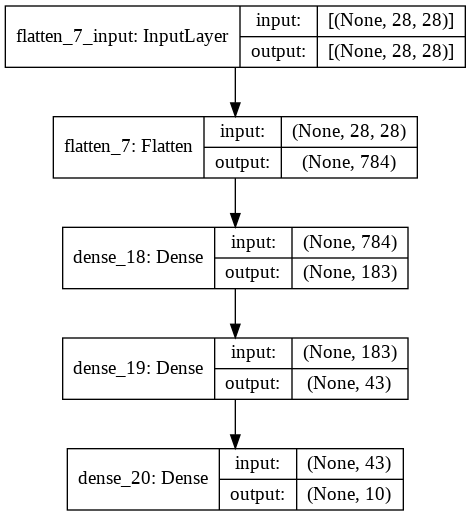

In [198]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

<b><h3> Optimizer and loss function:</h3></b>

In [199]:
model.compile(                                          # use default rmsprop optimizer
    metrics=['accuracy'], 
    loss=keras.losses.SparseCategoricalCrossentropy()   # labels provided as integers, for one-hot vectors use keras.losses.CategoricalCrossentropy
    )

<b><h3> Training the model: </h3></b>

In [200]:
history = model.fit(train_data, train_labels, verbose=0) # train the model

In [201]:
print("Model loss: {:.3f} \t Model accuracy: {:.3f}".format(history.history['loss'][0], history.history['accuracy'][0]))

Model loss: 0.236 	 Model accuracy: 0.932


<b><h3> Testing the model: </h3></b>

In [202]:
loss, accuracy = model.evaluate(test_data, test_lables, verbose=0)

In [203]:
print("Model loss (test data): {:.3f} \t Model accuracy (test data): {:.3f}".format(loss, accuracy))

Model loss (test data): 0.147 	 Model accuracy (test data): 0.956


<h3><b>Predictions:</b></h3>

In [223]:
import matplotlib.pyplot as plt
from matplotlib.text import Text
import numpy as np
import random

In [205]:
pred_data = model.predict(test_data)

In [219]:
class PredictionLabel(object):
    def __init__(self, digit, color="black"):
        self.text = "{}".format(digit)
        self.color = color

class PredictionLegendHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
      width, height = handlebox.width, handlebox.height
      tx = Text(width/3.,height/3., text=orig_handle.text, color=orig_handle.color, fontsize=fontsize, ha="center", va="center", fontweight="bold")
      handlebox.add_artist(tx)
      return [tx]

<h2>Test of 30 random samples - with the level of confidence in prediction</h2>
<p><font color='red'>Color red - incorrect prediction</font></p>
<p><font color='gree'>Color green - correct prediction</font></p>
<p>Example:</p>
<p>
0 - 0.001% </br>
1 - 0.000% </br>
2 - 0.032% </br>
<font color='red'>3 - 57.853%</font></br>
[...]</br>
<font color='gren'>8 - 40.001%</font></br>
9 - 2.777%
</p>

Should be interpreted as: 
<p>The prediction of this sample was <font color='red'>incorrect</font>. With <font color='red'>57% confidence</font> it is classified as the <font color='red'>wrong</font> digit.</br> <font color='gren'>The Green</font> color indicates the digit that supposed to be predicted as the <font color='gren'>correct</font> one.</p>

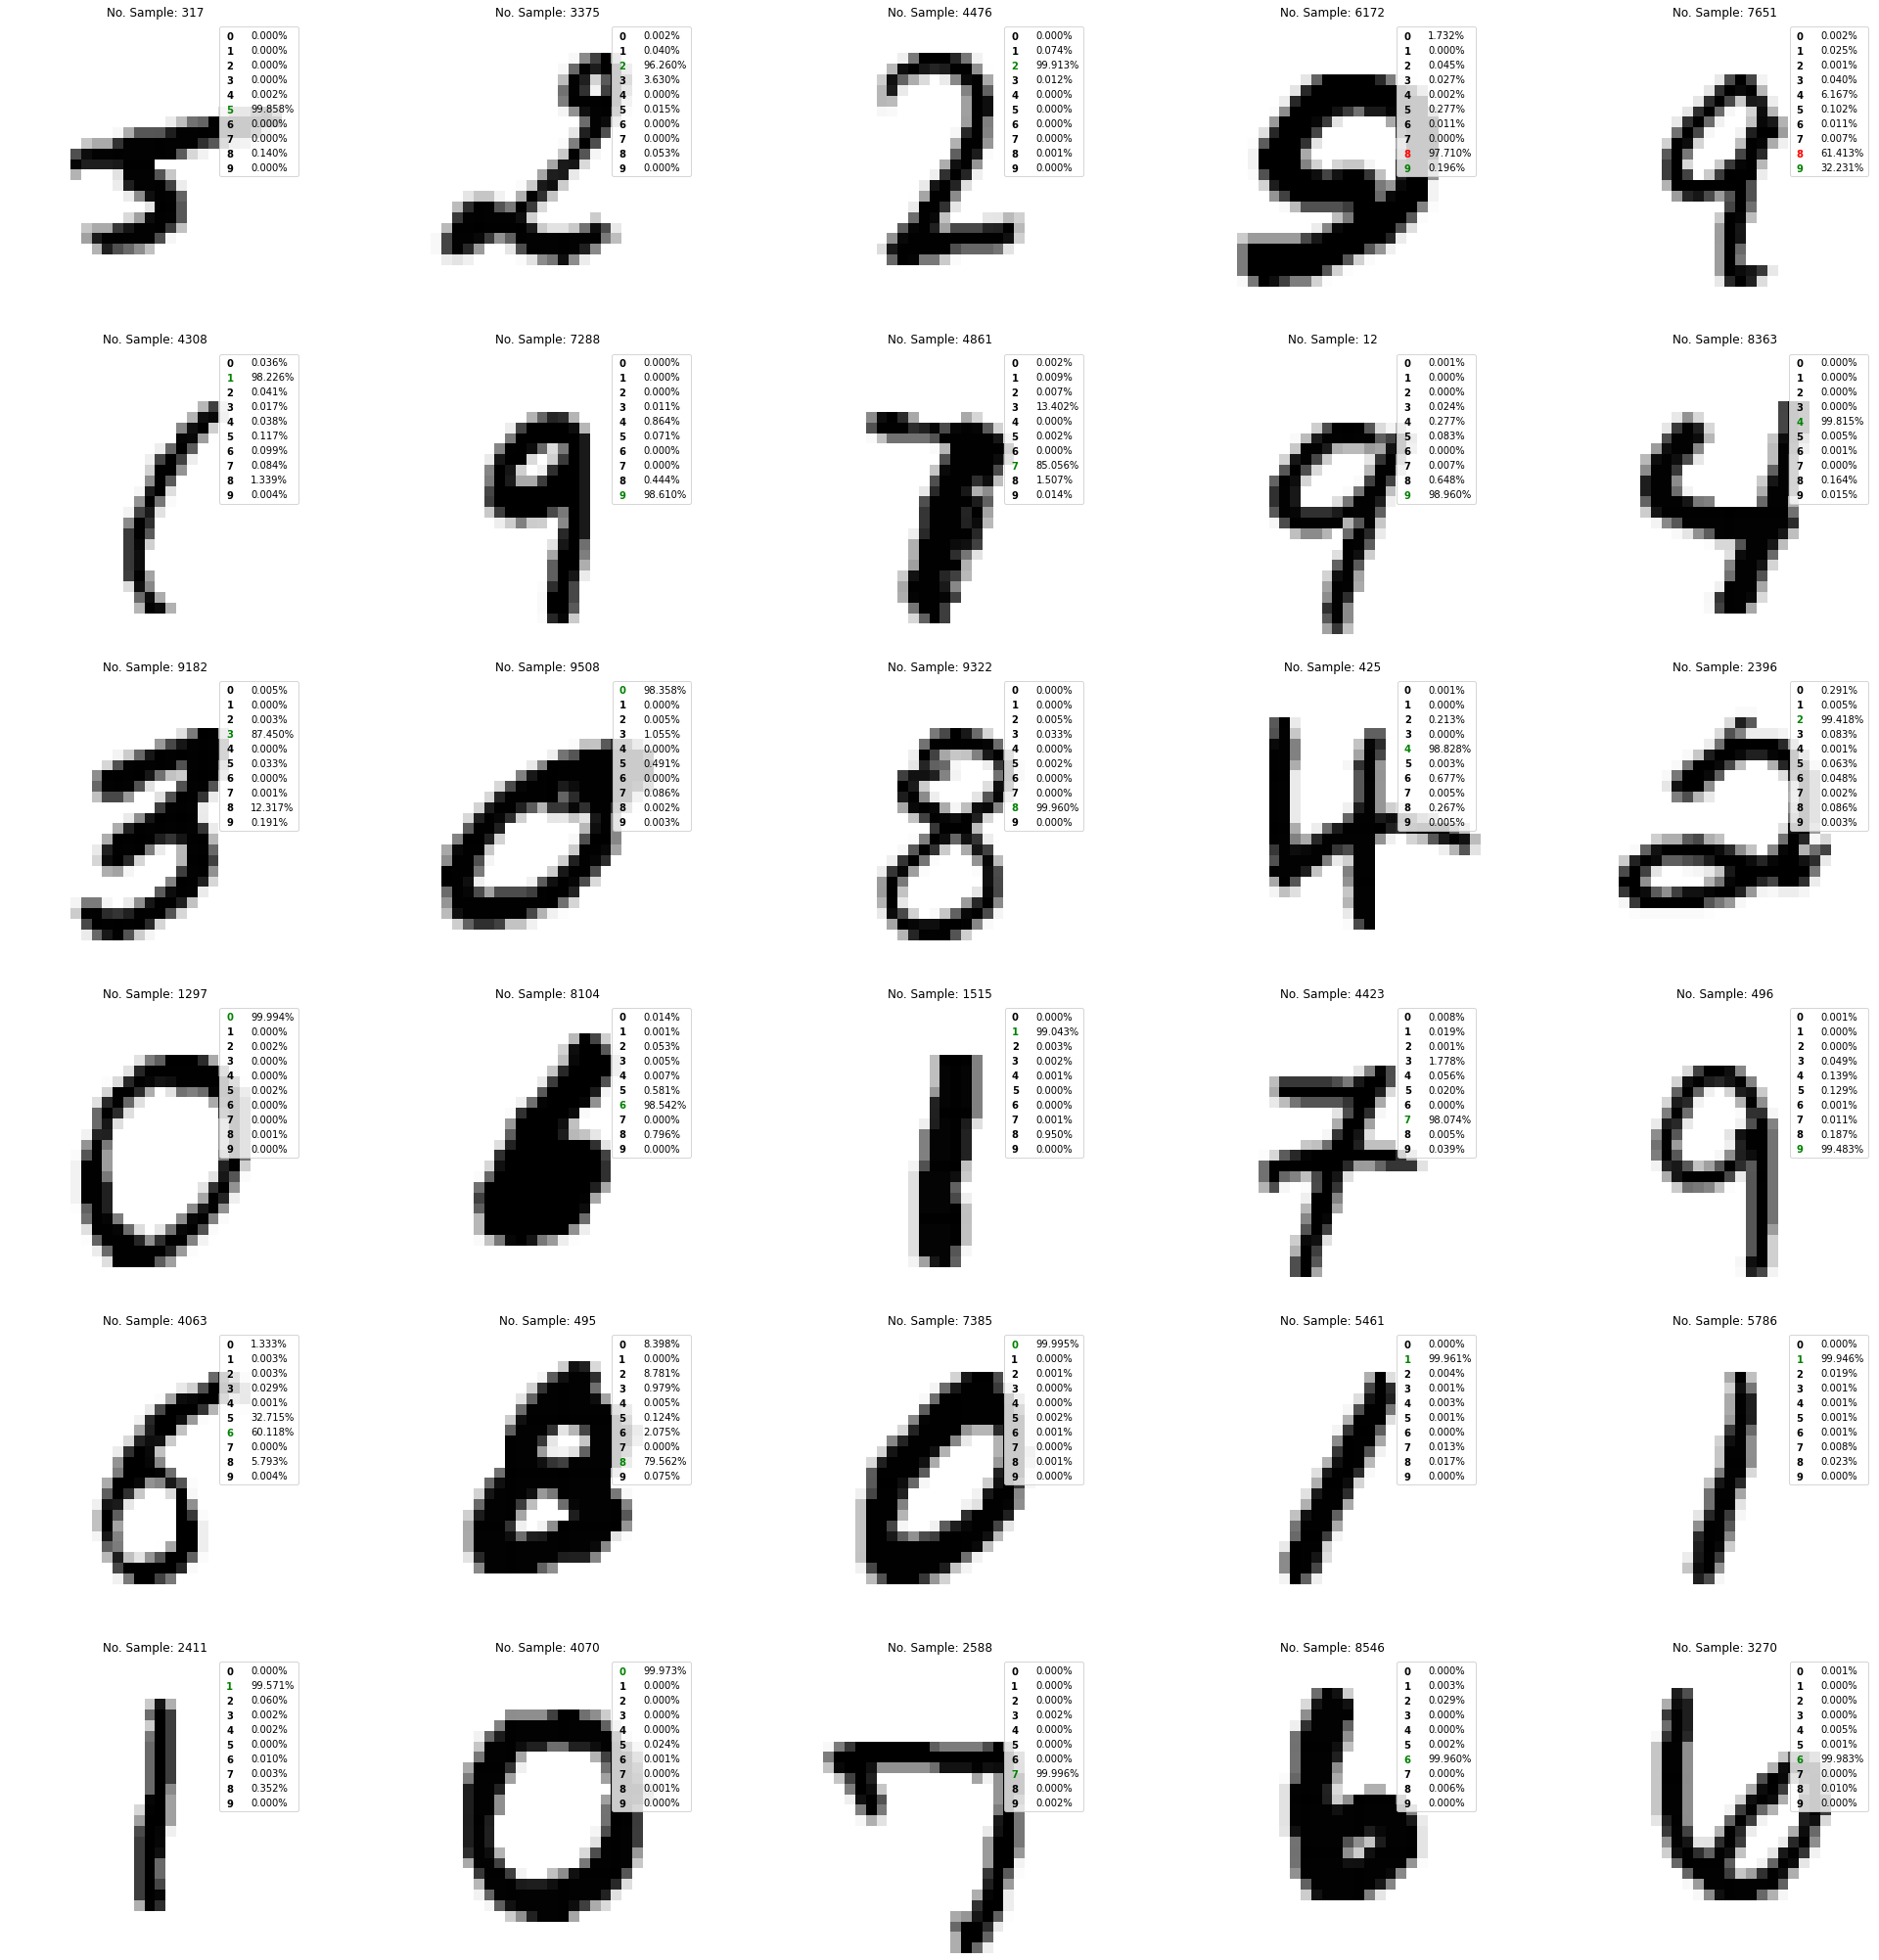

In [230]:
columns = 5; rows = 6;
fig, axs = plt.subplots(rows, columns)
fig.set_figwidth(28)
fig.set_figheight(28)
fig.tight_layout()

for i in range (0, columns*rows):
  sample = random.randrange(0, 10000) % 10000
  labels = [ PredictionLabel(x) for x in range(0, 10) ]
  labels[ np.argmax(pred_data[ sample ]) ] = PredictionLabel(np.argmax(pred_data[ sample ]), "red")
  labels[ test_labels[ sample ] ] = PredictionLabel(test_labels[ sample ], "green")
  labels_data = [ "{:.3f}%".format(pred_data[ sample ][x] * 100) for x in range(0,10) ]
  x = int(i/columns)
  y = int(i%columns)
  axs[ x ][ y ].imshow(test_data[ sample ], cmap=plt.cm.binary)
  axs[ x ][ y ].axis('off')
  axs[ x ][ y ].set_title("No. Sample: {}".format(sample))
  axs[ x ][ y ].legend(labels, labels_data, handler_map={PredictionLabel: PredictionLegendHandler()}, loc='best')

plt.savefig('test_results.png')